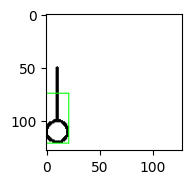

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET

#сгенерирем одну картинку
#фон
screen = np.full((128,128,3), 255, dtype = np.float32)
x = 10
y = 110
r = 10
t = 2
screen = cv2.circle(screen, (x,y), r, (0, 0 , 0), t)
screen = cv2.line(screen, (x,y-r), (x,y-r*6), (0, 0 , 0), t)
#найдем координаты рамки для этого кружка
xmin = int(x-(r+ t/2))
xmax = int(x+(r+ t/2))
ymin = int(y-(r*3.5+ t/2))
ymax = int(y+(r+ t/2))

#нарисуем рамку
screen = cv2.rectangle(screen ,(xmin, ymin ),(xmax, ymax),(0,255,0),1)

#готовим к выводу 
screen/=255
#стандартный вывод картинки matplotlib
plt.figure(figsize=(10, 6))
ax = plt.subplot(3, 1, 1)
plt.imshow(screen)
plt.show()    

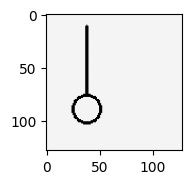

In [7]:
#это алгоритмический генератор картинок + запись параметров элементов
#в xml файл по стандарту labelimg

import random

#папка, в которую сохраняем картинки и xml-ки
folder = 'D:/Proga/object detection part two/image_dataset/'

#сколько хотим картинок
for count in range(1000):
    #кол-во кружков на картинку
    n = 1
    name = 'test_' + str(count)
    screen = np.full((128,128,3), random.randint(230,255), dtype = np.float32)
    
    #p-главный корневой элемент будущего xml
    #присоединяем к нему разные элементы по стандарту labelimg, чтобы все было совместимо
    #многие элементы не несут смысла
    p=ET.Element('annotation')
    c = ET.SubElement(p, 'folder')
    c.text = 'images'
    c = ET.SubElement(p, 'filename')
    c.text = name
    c = ET.SubElement(p, 'path')
    c.text = folder + name + '.png'
    c = ET.SubElement(p, 'sourse')
    c.text = 'hm'
    c = ET.SubElement(p, 'size')
    s = ET.SubElement(c, 'width')
    s.text = '128'
    s = ET.SubElement(c, 'height')
    s.text = '128'
    s = ET.SubElement(c, 'depth')
    s.text = '3'
    c = ET.SubElement(p, 'segmented')
    c.text = '0'

    for nn in range(n):
        x = random.randint(10,110)
        y = random.randint(10,110)
        r = random.randint(8, 15)
        t = random.randint(1, 3)
        #рисуем кружок
        screen = cv2.circle(screen, (x,y), r, (0, 0 , 0), t)
        screen = cv2.line(screen, (x,y-r), (x,y-r*6), (0, 0 , 0), t)
        #и описываем его в xml
        o = ET.SubElement(p, 'object')
        n = ET.SubElement(o, 'name')
        n.text = 'OSI'
        c = ET.SubElement(o, 'pose')
        c.text = 'un'
        c = ET.SubElement(o, 'truncated')
        c.text = '0'
        c = ET.SubElement(o, 'difficult')
        c.text = '0'
        bb = ET.SubElement(o, 'bndbox')
        
        #вычисляем и записываем кординаты

        xmin = int(x-(r+ t/2))
        xmax = int(x+(r+ t/2))
        ymin = int(y-(r*3.5+ t/2))
        ymax = int(y+(r+ t/2))

        xmin_ = ET.SubElement(bb, 'xmin')
        xmin_.text = str(xmin)
        ymin_ = ET.SubElement(bb, 'ymin')
        ymin_.text = str(ymin)
        xmax_ = ET.SubElement(bb, 'xmax')
        xmax_.text = str(xmax)
        ymax_ = ET.SubElement(bb, 'ymax')
        ymax_.text = str(ymax)

    #сохраняем p
    tree = ET.ElementTree(p)
    #эта строчка чтобы запись была с отступами, а не одной строкой и читалась нормально
    #не влияет на програмное чтение xml
    ET.indent(tree, '  ')
    #сохраняем xml
    tree.write(folder + name +'.xml', encoding="utf-8") 
    #сохраняем картинку
    cv2.imwrite(folder + name + '.png' , screen)
screen/=255

plt.figure(figsize=(10, 6))
ax = plt.subplot(3, 1, 1)
plt.imshow(screen)

plt.show()        